In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from vega import VegaLite
import numpy as np
from poitousprint import Portic
portic_client = Portic()

In [313]:
#pointcalls = portic_client.get_pointcalls(year=1789, source_subset="Poitou_1789")

In [314]:
#len(pointcalls)

In [315]:
sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [316]:
sorties_mixtes = pd.read_csv("sorties_navires_vers_etranger_mixte_DFLR_ailleurs1787.csv")
sorties = sorties_mixtes[sorties_mixtes.region_depart == "Aunis-Saintonge-Poitou"]

In [ ]:
sorties_mixtes = pd.read_csv("sorties_navires_vers_etranger_mixte_DFLR_ailleurs1787.csv")
sorties_Bretagne = sorties_mixtes[sorties_mixtes.region_depart == "Bretagne"]
sorties_Guyenne = sorties_mixtes[sorties_mixtes.region_depart == "Guyenne"]
sorties_Nantes = sorties_mixtes[sorties_mixtes.amiraute_depart == "Nantes"]

In [ ]:
sorties_Nantes.shape

In [ ]:
sorties.shape

In [ ]:
sorted(sorties_mixtes.columns)

In [ ]:
len(sorties)

In [325]:
sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")

<ipython-input-325-19f52f823b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")


In [ ]:
len(sorties[sorties.homeport_state_1789_fr.isna()])

In [ ]:
sorties[sorties.homeport_state_1789_fr.isna()].sample(5)

In [ ]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [ ]:
sorties[sorties.homeport_state_1789_fr.isna()][["homeport_state_1789_fr", "ship_flag_standardized_fr"]].sample(5)

In [ ]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

In [ ]:
sorties[["homeport_state_1789_fr", "ship_flag_standardized_fr", "flag"]].sample(5)

In [ ]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

In [ ]:
sorties.homeport_state_1789_fr.value_counts()

In [ ]:
sorties.state_destination.value_counts()

In [ ]:
sorties[sorties.state_destination.isna()]

In [ ]:
sorties.substate_destination.value_counts()

In [ ]:
sorties[sorties.substate_destination.isna()]

In [326]:
sorties["destination"] = sorties["substate_destination"].fillna(sorties["state_destination"])

<ipython-input-326-1fb69e4749ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorties["destination"] = sorties["substate_destination"].fillna(sorties["state_destination"])


In [ ]:
sorties.destination.value_counts()

In [ ]:
sorties.homeport_province.value_counts()

In [ ]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

In [ ]:
sorties["Port d'attache"] = sorties["outside_DFLR"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})

In [ ]:
(sorties.groupby("Port d'attache").size()).plot.barh()
plt.title("Nombre de navires qui partent vers l'étranger ou les colonies")
plt.show()

In [ ]:
(sorties.groupby("Port d'attache").size()*100/len(sorties)).plot.barh()
plt.xticks(np.arange(0, 100, 10))
plt.title("Part des navires qui proviennent d'Aunis, Poitou ou Saintonge parmi tous ceux qui partent vers l'étranger ou les colonies")
plt.show()

In [ ]:
sorties["commodity_standardized_fr"] = sorties["commodity_standardized_fr"].fillna("")

In [ ]:
colonies = pd.read_csv("sorties_navires_vers_colonies.csv")

In [ ]:
colonies

In [ ]:
colonies["commodity_standardized_fr"] = colonies["commodity_standardized_fr"].fillna("")

In [ ]:
colonies["vers_colonies"] = (
    colonies.substate_destination.str.startswith("colonie") & 
    (~colonies.commodity_standardized_fr.str.startswith("Pêche")) &
    (~colonies.port_destination.str.startswith("Saint-Pierre-et-Miquelon")) &
    (~colonies.port_destination.str.startswith("Terre-Neuve"))

)

In [ ]:
colonies

In [ ]:
colonies[colonies.vers_colonies == True][["port_depart", "outdate_fixed", "port_destination", "homeport_province", "substate_destination", "commodity_standardized_fr", "tonnage", "tonnage_unit", "tonnage_class"]]

In [ ]:
"""
ax = sns.countplot(x="vers_colonies", data=sorties)
"""

In [ ]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

In [ ]:
nb_pointcalls = noDFLR.groupby("homeport_state_1789_fr").size()
nb_pointcalls.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

In [ ]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

In [ ]:
destination = noDFLR.groupby("state_destination").size()
destination.sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

In [ ]:
noDFLR.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

In [ ]:
sorties_Bretagne.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires partis de Bretagne vers l'étranger en 1787, en tonnage total")
plt.show()

In [ ]:
sorties_Nantes.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires partis de Nantes (amirauté) vers l'étranger en 1787, en tonnage total")
plt.show()

In [ ]:
sorties_Guyenne.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires partis de Guyenne vers l'étranger en 1787, en tonnage total")
plt.show()

In [ ]:
sns.countplot(data=sorties_mixtes, y="state_destination")

In [ ]:
g = sns.FacetGrid(sorties_mixtes, row="region_depart")
g.map_dataframe(sns.countplot, y="state_destination", order=sorties_mixtes.state_destination.unique())
#g.set_axis_labels("Total bill", "Tip")
#g.add_legend()

In [ ]:
VegaLite({
  "facet": {"row": {"field": "region_depart"}},
  "spec": {
    "mark": "bar",
    "encoding": {
      "x": {
        "bin": {"maxbins": 15},
        "field": "Horsepower",
        "type": "quantitative"
      },
      "y": {"aggregate": "count", "type": "quantitative"}
        
    }
  }
}, sorties_mixtes)

In [ ]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province").size()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en nb de navires")
plt.show()

In [ ]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage total")
plt.show()

In [ ]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].mean().sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage moyen")
plt.show()

In [ ]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("substate_destination").size().sort_values().plot.barh()
plt.title("Destinations des navires français (hors Aunis, Poitou ou Saintonge) qui partent vers l'étranger ou les colonies, en nombre de navires")
plt.show()

<img src="mon_image.png">

In [ ]:
"""
from IPython.core.display import SVG
SVG(filename=‘path_to_fichier.svg')
"""

## Focus sur la Grande-Bretagne

In [328]:
gb = sorties[sorties.state_destination == "Grande-Bretagne"]

In [329]:
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna(gb["homeport_province"])
gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna("Grande-Bretagne, province absente")

<ipython-input-329-1feb56607760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna(gb["homeport_province"])
<ipython-input-329-1feb56607760>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb["homeport_substate_1789_fr"] = gb["homeport_substate_1789_fr"].fillna("Grande-Bretagne, province absente")


In [ ]:
len(gb)

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
gb.groupby("destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Décomposition de la destinations des navires DFLR vers la Grande-Bretagne, en tonage total")
plt.show()

In [ ]:
gb.groupby("destination").size().sort_values().plot.barh()
plt.title(
    "Décomposition de la destinations des navires DFLR vers la Grande-Bretagne, en nb de navires")
plt.show()

In [ ]:
from vega import VegaLite

In [ ]:
gb.columns

In [321]:
gb[gb.homeport_substate_1789_fr.isna()][["homeport_province", "homeport_state_1789_fr", "ship_flag_standardized_fr"]]

,homeport_province,homeport_state_1789_fr,ship_flag_standardized_fr


In [330]:
gb["count"] = 1

<ipython-input-330-8f8b0efb5efd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb["count"] = 1


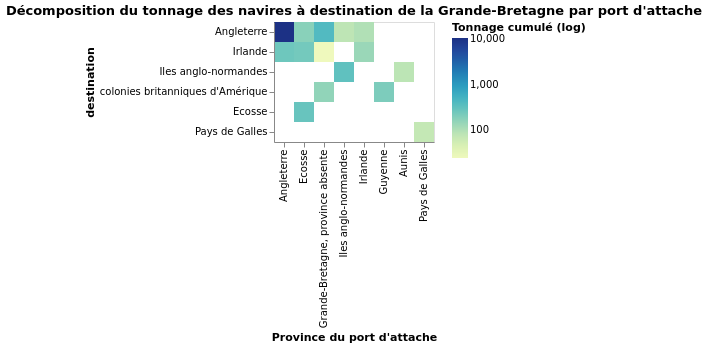

In [331]:
VegaLite({
    "title": "Décomposition du tonnage des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "y": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination",
            "sort": "-color"
        },
        "x": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "tonnage",
            "title": "Tonnage cumulé (log)",
            "scale": {
                "type": "log"
            }
        }
    }
}, gb)

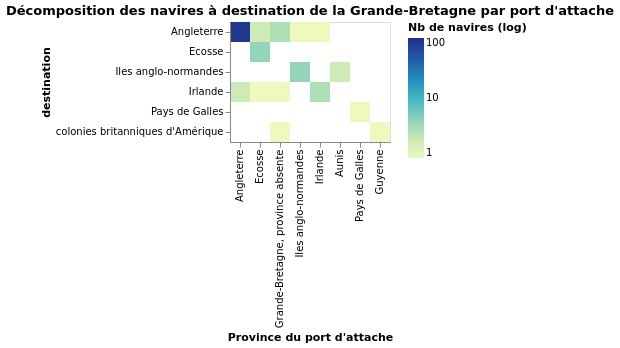

In [332]:
VegaLite({
    "title": "Décomposition des navires à destination de la Grande-Bretagne par port d'attache",
    "mark": "rect",
    "encoding": {
        "y": {
            "type": "nominal", 
            "field": "destination",
            "title": "destination"
        },
        "x": {
            "field": "homeport_substate_1789_fr",
            "type": "nominal",
            "title": "Province du port d'attache",
            "sort": "-color"
        },
        "color": {
            "type": "quantitative",
            "aggregate": "sum",
            "field": "count",
            "title": "Nb de navires (log)",
            "scale": {
                "type": "log",
                "domain": [1,100]
            }
        }
    }
}, gb)